# Spotify Univariate Exploratory Data Analysis
In this notebook I will be performing some exploratory data analysis on a data set of songs taken from Spotify's Web API from the years 1921 to 2020. This notebook will be the first in a series of notebooks involving this data set. This notebook will only look at the univariate data of each feature and how they are distributed throughout the data set.

In [2]:
pip install plotly


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=0f3010d01be14db62587181152688883b487526b5d5e1db58c2069bea9ba336d
  Stored in directory: c:\users\mille\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [3]:
# Import necessary libraries
import pandas as pd #data loading and manipulation
import seaborn as sns #graphing/visualizing
import os
import matplotlib.pyplot as plt #graphing/visualizing
import plotly.express as px #graphing/visualizing
import numpy as np #Linear Algebra

In [4]:
print('my path is',os.getcwd())

my path is C:\Users\mille\Python Projects\Spotify


In [6]:
# Import the data set
df = pd.read_csv('C:/Users/mille/Python Projects/Spotify/Spotify Data.csv')

In [7]:
# Convert release_date feature from object to date time
df['release_date'] = pd.to_datetime(df['release_date'])

# Create new column based solely on the year of date time
df['year'] = df['release_date'].dt.year

# Drop old release_date column
df = df.drop(columns = 'release_date', axis = 1, inplace = False)

# Drop the id column
df = df.drop(columns = 'id', axis = 1, inplace = False)

# Convert duration_ms to duration measured in seconds
df['duration'] = round(df['duration_ms']/(1000),2)

# Drop duration_ms column
df = df.drop(columns = 'duration_ms', axis = 1, inplace = False)

# View the first five rows of the data set after all edits
df.head()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,duration
0,0.991000,['Mamie Smith'],0.598,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,168.33
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,150.20
2,0.993000,['Mamie Smith'],0.647,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920,163.83
3,0.000173,['Oscar Velazquez'],0.730,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,422.09
4,0.295000,['Mixe'],0.704,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920,165.22


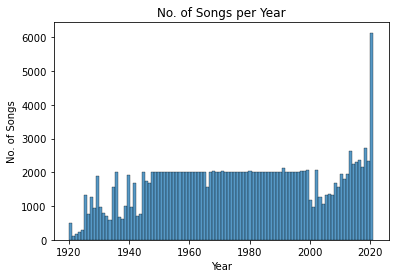

In [8]:
# Graphically display year and number of songs
ax = sns.histplot(data = df, x = 'year', bins = 100)
ax.set(xlabel = 'Year', ylabel = 'No. of Songs', title = 'No. of Songs per Year')
plt.show()

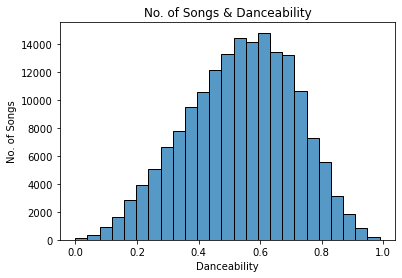

The average level of danceability is 0.54


In [9]:
# Graphically examine the number of songs and danceability
ax = sns.histplot(data = df, x = 'danceability', bins = 25)
ax.set(xlabel = 'Danceability', ylabel = 'No. of Songs', title = 'No. of Songs & Danceability')
plt.show()
print('The average level of danceability is', round(np.mean(df['danceability']),2))

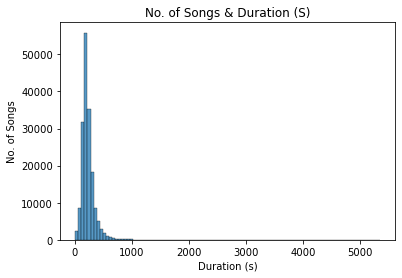

The average duration in seconds of a song is 232.81 seconds


In [10]:
# Graphically examine the number of songs and their duration
ax = sns.histplot(data = df, x = 'duration', bins = 100)
ax.set(xlabel = 'Duration (s)', ylabel = 'No. of Songs', title = 'No. of Songs & Duration (S)')
plt.show()
print('The average duration in seconds of a song is', round(np.mean(df['duration']),2),'seconds')

In [11]:
# Display the measures of central tendency for duration
round(df['duration'].describe(),2)

count    174389.00
mean        232.81
std         148.40
min           4.94
25%         166.13
50%         205.79
75%         265.72
max        5338.30
Name: duration, dtype: float64

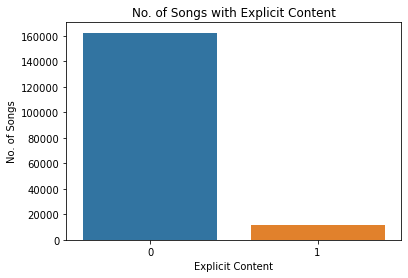

0    162507
1     11882
Name: explicit, dtype: int64


In [12]:
# Graphically examine the number of songs with explicit content
ax = sns.countplot(data = df, x = 'explicit')
ax.set(xlabel = 'Explicit Content', ylabel = 'No. of Songs', title = 'No. of Songs with Explicit Content')
plt.show()
print(df['explicit'].value_counts())

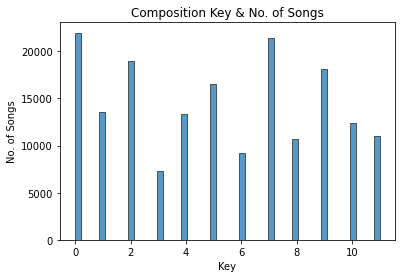

In [13]:
# Graphically examine the number of songs in each octave key C, C#, ...
ax = sns.histplot(data = df, x = 'key')
ax.set(xlabel = 'Key', ylabel = 'No. of Songs', title = 'Composition Key & No. of Songs')
plt.show()

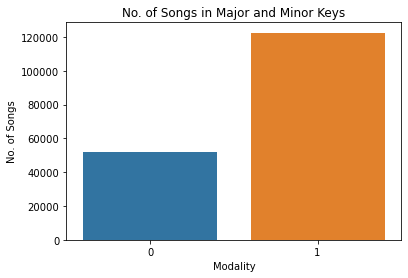

1    122488
0     51901
Name: mode, dtype: int64


In [14]:
# Graphically examine the number of songs written in a minor or major key
ax = sns.countplot(x = 'mode', data = df)
ax.set(xlabel = 'Modality', ylabel = 'No. of Songs', title = 'No. of Songs in Major and Minor Keys')
plt.show()
print(df['mode'].value_counts())

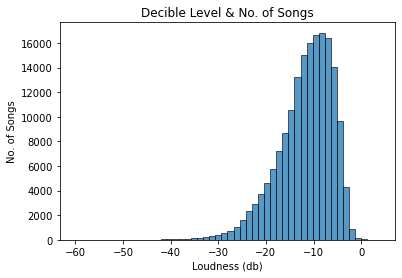

The average decible level is -11.75


In [15]:
# Graphically examine the number of songs and loudness
ax = sns.histplot(data = df, x = 'loudness', bins = 50)
ax.set(xlabel = 'Loudness (db)', ylabel = 'No. of Songs', title = 'Decible Level & No. of Songs')
plt.show()
print('The average decible level is', round(np.mean(df['loudness']),2))

In [16]:
# Display measures of central tendency
round(df['loudness'].describe(),2)

count    174389.00
mean        -11.75
std           5.69
min         -60.00
25%         -14.91
50%         -10.84
75%          -7.50
max           3.86
Name: loudness, dtype: float64

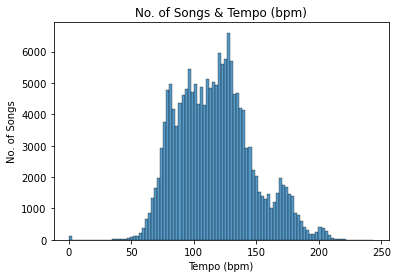

The average tempo of a song is 117.01 beats per minute


In [17]:
# Graphically examine the number of songs with specific tempos
ax = sns.histplot(data = df, x = 'tempo', bins = 100)
ax.set(xlabel = 'Tempo (bpm)', ylabel = 'No. of Songs', title = 'No. of Songs & Tempo (bpm)')
plt.show()
print('The average tempo of a song is', round(np.mean(df['tempo']),2), 'beats per minute')

In [18]:
# Display the measures of central tendency
round(df['tempo'].describe(),2)

count    174389.00
mean        117.01
std          30.25
min           0.00
25%          93.93
50%         115.82
75%         135.01
max         243.51
Name: tempo, dtype: float64

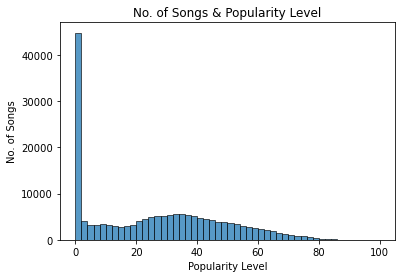

The average level of popularity is 25.69


In [19]:
# Graphically examine the number of songs and popularity
ax = sns.histplot(data = df, x = 'popularity', bins = 50)
ax.set(xlabel = 'Popularity Level', ylabel = 'No. of Songs', title = 'No. of Songs & Popularity Level')
plt.show()
print('The average level of popularity is', round(np.mean(df['popularity']),2))

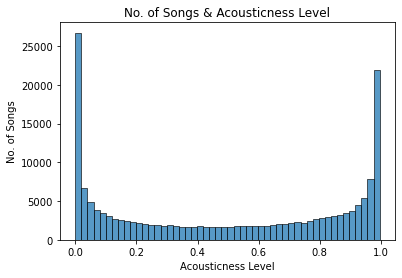

The average level of acousticness is 0.5


In [20]:
# Graphically examine the number of songs and acousticness
ax = sns.histplot(data = df, x = 'acousticness', bins = 50)
ax.set(xlabel = 'Acousticness Level', ylabel = 'No. of Songs', title = 'No. of Songs & Acousticness Level')
plt.show()
print('The average level of acousticness is', round(np.mean(df['acousticness']),2))

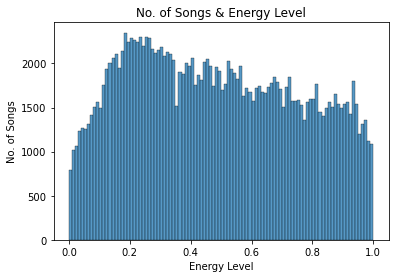

The average level of energy is 0.48


In [21]:
# Graphically examine the level of energy in songs
ax = sns.histplot(data = df, x = 'energy', bins = 100)
ax.set(xlabel = 'Energy Level', ylabel = 'No. of Songs', title = 'No. of Songs & Energy Level')
plt.show()
print('The average level of energy is', round(np.mean(df['energy']),2))

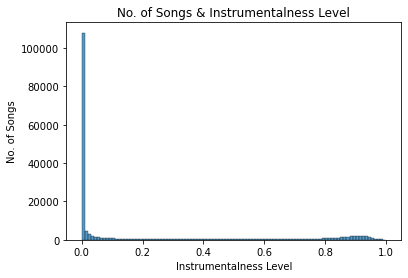

The average level of instrumentalness is 0.2


In [22]:
# Graphically examine the level of instrumentalness in songs
ax = sns.histplot(data = df, x = 'instrumentalness', bins = 100)
ax.set(xlabel = 'Instrumentalness Level', ylabel = 'No. of Songs', title = 'No. of Songs & Instrumentalness Level')
plt.show()
print('The average level of instrumentalness is', round(np.mean(df['instrumentalness']),2))

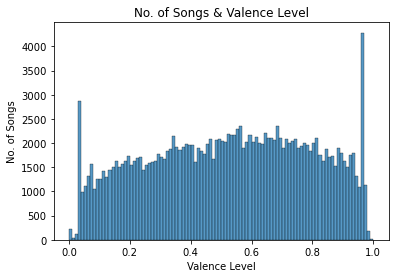

The average level of valence is 0.52


In [23]:
# Graphically examine the level of valence in songs
ax = sns.histplot(data = df, x = 'valence', bins = 100)
ax.set(xlabel = 'Valence Level', ylabel = 'No. of Songs', title = 'No. of Songs & Valence Level')
plt.show()
print('The average level of valence is', round(np.mean(df['valence']),2))

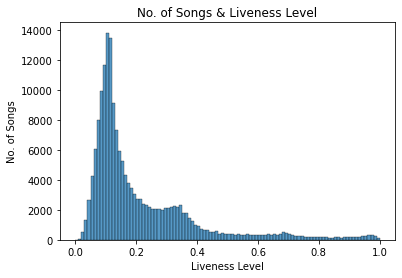

The average level of liveness is 0.21


In [24]:
# Graphically examine the level of liveness in songs
ax = sns.histplot(data = df, x = 'liveness', bins = 100)
ax.set(xlabel = 'Liveness Level', ylabel = 'No. of Songs', title = 'No. of Songs & Liveness Level')
plt.show()
print('The average level of liveness is', round(np.mean(df['liveness']),2))

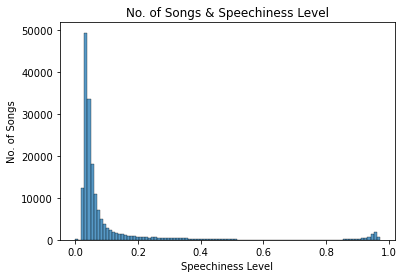

The average level of speechiness is 0.11


In [25]:
# Graphically examine the level of speechiness in songs
ax = sns.histplot(data = df, x = 'speechiness', bins = 100)
ax.set(xlabel = 'Speechiness Level', ylabel = 'No. of Songs', title = 'No. of Songs & Speechiness Level')
plt.show()
print('The average level of speechiness is', round(np.mean(df['speechiness']),2))

# Conclusions

- In the year 2020 there were 6134 songs released. This was the largest number of songs released from 1921 to 2020. In comparison, from 1922 to 1923 there were only 306 songs that were released, making for the lowest amount of songs released. It could also be of note that from 1948 till about 1965 there number of songs released remained relatively uniform, being only around 4000.
- The distribution of the number of songs and their duration in milliseconds is incredibly right skewed. I converted the average duration of a song to seconds which was 232.81 seconds. To get a further insight into the duration of a song, I am going to run some descriptive statistics(measures of central tendency) after converting the column temporarily to seconds
- According to the bar graph there are 162507 songs that are considered "clean" without any explicit content. In addition, there are 11882 songs that have explicit content
- The above graph shows that there are 122488 songs written in a major key. There are 51901 written in a minor key
- The distribution of the graph regarding the number of songs and their popularity is approximately right skewed with an average level of 25.69. Again, to provide more insight we will look into the measures of central tendency.
- The graph shows that there are 21967 songs composed in the key of C closely followed by 21363 songs composed in the key of G. The key of D# and F# have the least number with 7280 and 9226 respectively
- The shape of the histogram regarding danceability is approximately normal, centered around the average level of danceability of .54
- From the measures of central tendency we see that the average song length is 232.81 seconds with a standard deviation of 148.4 seconds. The median duration of a song is 205.79 seconds.
- According to the measures of central tendency we see that the average popularity level of a song is 25.69 with a standard deviation of 21.87. The median popularity level of all the songs is 25.
- The average tempo for a song is 117.01 bpm with a standard deviation of 30.25 bpm. The median tempo of a song is 115.82 bpm